In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def count_syllables(syllb):
    counter = 0 # count number of syllables
    i = 0 # index of syllb

    while i <= len(syllb): # loop through syllb
        if syllb[i:i+3] in ['CVC']: # let's look for CVC pattern first (like 'fuʁ' in [fuʁmi])
            counter += 1 # we consider this a syllable
            i += 3 # move index by 3 (CVC pattern is of length 3)
        elif syllb[i:i+2] in ['CV', 'VC']: # then look for CV or VC pattern (like mo in [movɛ])
            counter += 1 # we consider this a syllable
            i += 2 # move index by 2 (CV or VC pattern is of length 2)
        elif syllb[i:i+2] in ['CC', 'VV']: # then look for CC or VV paterns (usually not a syllable)
            i += 1 # move index by 1 (we are looking for CVC or CV/VC or just V or C)
        else:
            counter += 1
            i += 1

    return counter - 1 # we subtract 1 because the last else also captures empty string

### 0. Basic CLDF manipulation

The lexibank data can be downloaded from [here](https://zenodo.org/records/7836668). You then need to unzip it, and the unzip the forms.csv file in the cldf forlder. Here is an automated script that does that for you:

In [3]:
# unzip the lexibank-analysed-v1.0.zip file in the data folder
!unzip -o data/lexibank-analysed-v1.0.zip -d data/
# unzip the forms.csv file in the cldf folder
!unzip -o data/lexibank-lexibank-analysed-a4c0952/cldf/forms.csv.zip -d data/lexibank-lexibank-analysed-a4c0952/cldf/

unzip:  cannot find or open data/lexibank-analysed-v1.0.zip, data/lexibank-analysed-v1.0.zip.zip or data/lexibank-analysed-v1.0.zip.ZIP.


Archive:  data/lexibank-lexibank-analysed-a4c0952/cldf/forms.csv.zip
  inflating: data/lexibank-lexibank-analysed-a4c0952/cldf/forms.csv  


We need tree files; forms, languages and concepts:

In [59]:
forms = pd.read_csv('data/lexibank-lexibank-analysed-a4c0952/cldf/forms.csv')
languages = pd.read_csv('data/lexibank-lexibank-analysed-a4c0952/cldf/languages.csv')
concepts = pd.read_csv('data/lexibank-lexibank-analysed-a4c0952/cldf/concepts.csv')

In [60]:
# match forms with languages by Language_ID and ID
forms = forms.merge(languages, left_on='Language_ID', right_on='ID')
# match concepts by Parameter_ID and ID
forms = forms.merge(concepts, left_on='Parameter_ID', right_on='ID')
forms['Length'] = forms['Segments'].str.strip().str.count(' ') + 1
# convert Glottocode column to string
forms['Glottocode'] = forms['Glottocode'].astype(str)
forms['Number_of_meanings'] = forms.groupby(['Form', 'Language_ID'])['Concepticon_ID'].transform('nunique')

Let's look at the dataset we have:

In [61]:
forms.sort_values(by='Number_of_meanings')

,ID_x,Language_ID,Parameter_ID,Form,Segments,Comment,Source,Value,Local_ID,Graphemes,...,ID,Name_y,Description,ColumnSpec,Concepticon_ID,Concepticon_Gloss,Central_Concept,Core_Concept,Length,Number_of_meanings
0,aaleykusunda-KusundaK-above-1,aaleykusunda-KusundaK,above,ɐ̃ː.ʤi,ɐ̃ː + dʒ i,NaN,Aaley2019,nɔ̃ː.ʤi ɐ̃ː.ʤi,aaleykusunda-KusundaK-1_above-1,NaN,...,above,ABOVE,NaN,NaN,1741,ABOVE,HIGH,NaN,4,1.0
453867,abvdoceanic-RapanuiEasterIsland-cutorhack-7,abvdoceanic-RapanuiEasterIsland,cutorhack,hore,h o r e,NaN,Greenhill2008,hore,abvdoceanic-RapanuiEasterIsland-78_tocuthack-7,NaN,...,cutorhack,CUT OR HACK,NaN,NaN,3889,CUT OR HACK,NaN,NaN,4,1.0
453868,abvdoceanic-RapanuiEasterIsland-cutorhack-8,abvdoceanic-RapanuiEasterIsland,cutorhack,tata,t a t a,NaN,Greenhill2008,tata,abvdoceanic-RapanuiEasterIsland-78_tocuthack-8,NaN,...,cutorhack,CUT OR HACK,NaN,NaN,3889,CUT OR HACK,NaN,NaN,4,1.0
453869,abvdoceanic-Lakalai-cutorhack-1,abvdoceanic-Lakalai,cutorhack,vari,v a r i,NaN,Greenhill2008,vari,abvdoceanic-Lakalai-78_tocuthack-1,NaN,...,cutorhack,CUT OR HACK,NaN,NaN,3889,CUT OR HACK,NaN,NaN,4,1.0
453870,abvdoceanic-Lakalai-cutorhack-2,abvdoceanic-Lakalai,cutorhack,tubi,t u b i,NaN,Greenhill2008,tubi,abvdoceanic-Lakalai-78_tocuthack-2,NaN,...,cutorhack,CUT OR HACK,NaN,NaN,3889,CUT OR HACK,NaN,NaN,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617305,savelyevturkic-Dolgan-with-1,savelyevturkic-Dolgan,with,NaN,n a n,NaN,Savelyev2020,NaN,savelyevturkic-Dolgan-247_with-1,NaN,...,with,WITH,NaN,NaN,1340,WITH,AND,Swadesh-1952-200,3,NaN
630557,marrisonnaga-Jingpho-self-2,marrisonnaga-Jingpho,self,NaN,n a n,NaN,Marrison1967,NaN,marrisonnaga-Jingpho-640_self-2,NaN,...,self,SELF,NaN,NaN,1993,SELF,NaN,NaN,3,NaN
648333,johanssonsoundsymbolic-Kunza-lowerleg-1,johanssonsoundsymbolic-Kunza,lowerleg,NaN,n a n,NaN,Johansson2020,NaN,johanssonsoundsymbolic-Kunza-123_lowerleg-1,NaN,...,lowerleg,LOWER LEG,NaN,NaN,447,LOWER LEG,LEG,NaN,3,NaN
655641,transnewguineaorg-gaikundi-wetwoexclusive-1,transnewguineaorg-gaikundi,wetwoexclusive,NaN,n a n,NaN,Greenhill2015,NaN,transnewguineaorg-gaikundi-1866_weexclpluralpr...,NaN,...,wetwoexclusive,WE TWO (EXCLUSIVE),NaN,NaN,2636,WE TWO (EXCLUSIVE),WE TWO,NaN,3,NaN


In [38]:
forms.to_csv('data/forms_total.csv', index=False)

### 0. All data

Count the number of Forms per Language:

In [7]:
forms.dropna(subset=['Family'], inplace=True) 

In [8]:
n_form_family = forms.groupby(["Language_ID", "Family"])["Form"].count().reset_index()
n_form_family = n_form_family.groupby("Family")["Form"].mean().round(1).reset_index()
n_form_family.sort_values(by="Form", ascending=False, inplace=True)

In [9]:
n_form_family.query("Family == 'Indo-European'")

,Family,Form
69,Indo-European,859.4


In [10]:
n_form_family["Form"].min()

110.0

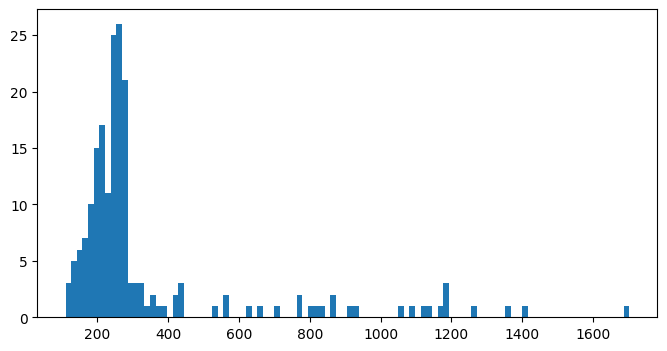

In [11]:
plt.figure(figsize=(8, 4))
plt.hist(n_form_family["Form"], bins=100)
plt.show()

In [12]:
n_forms_lg = forms.groupby("Language_ID")["Form"].count().reset_index()

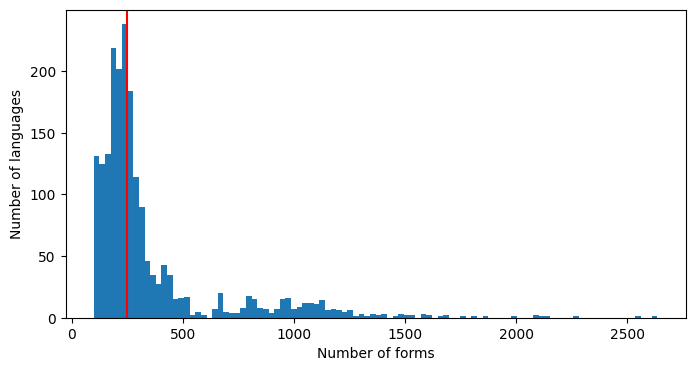

In [13]:
plt.figure(figsize=(8, 4))
plt.hist(n_forms_lg["Form"], bins=100)
plt.axvline(n_form_family["Form"].median(), color="red")
plt.xlabel("Number of forms")
plt.ylabel("Number of languages")
plt.show()

In [14]:
n_forms_lg.query("Form >= 251.0")

,Language_ID,Form
0,abrahammonpa-BugunBichom,253
5,abrahammonpa-MonpaChangprong,314
6,abrahammonpa-MonpaDirang,315
7,abrahammonpa-MonpaKalaktang,318
8,abrahammonpa-NamreiNabolang,320
...,...,...
1946,zgraggenmadang-watiwa,310
1947,zgraggenmadang-waube,329
1948,zgraggenmadang-yabong,326
1949,zgraggenmadang-yangulam,273


### 1. French data

Then we can extract the French data using the [glottocode](https://glottolog.org/resource/languoid/id/stan1290). The glottocode for French is *stan1290*. We can use it to filter the data:

In [48]:
stan1290 = forms[forms['Glottocode'] == 'stan1290']
stan1290.head(3)

,ID_x,Language_ID,Parameter_ID,Form,Segments,Comment,Source,Value,Local_ID,Graphemes,...,ID,Name_y,Description,ColumnSpec,Concepticon_ID,Concepticon_Gloss,Central_Concept,Core_Concept,Length,Colexification
1303,northeuralex-fra-all-1,northeuralex-fra,all,tu,t u,NaN,Dellert2020,tout,northeuralex-fra-639_everything-1,NaN,...,all,ALL,NaN,NaN,98,ALL,MANY,Swadesh-1952-200 Swadesh-1955-100 Starostin-19...,2,1.0
2640,northeuralex-fra-ant-1,northeuralex-fra,ant,fuʁˈmi,f u ʁ m i,NaN,Dellert2020,fourmi,northeuralex-fra-166_ant-1,NaN,...,ant,ANT,NaN,NaN,587,ANT,ANT,Tadmor-2009-100,5,1.0
3809,northeuralex-fra-bad-1,northeuralex-fra,bad,moˈvɛ,m o v ɛ,NaN,Dellert2020,mauvais,northeuralex-fra-559_bad-1,NaN,...,bad,BAD,NaN,NaN,1292,BAD,BAD,Swadesh-1952-200,4,3.0


In [49]:
stan1290.shape

(1147, 42)

For now, we only need the **Form**, **Segments** and **Concepticon_ID** columns. We can extract them using the following code:

In [50]:
stan1290 = stan1290[['Value', 'Form', 'Segments', 'Concepticon_ID', 'Concepticon_Gloss', 'CV_Template']]
stan1290['N_Syllables'] = stan1290['CV_Template'].apply(count_syllables)
stan1290.head(10)

,Value,Form,Segments,Concepticon_ID,Concepticon_Gloss,CV_Template,N_Syllables
1303,tout,tu,t u,98,ALL,CV,1
2640,fourmi,fuʁˈmi,f u ʁ m i,587,ANT,CVCCV,2
3809,mauvais,moˈvɛ,m o v ɛ,1292,BAD,CVCV,2
6016,vivant,viˈvɑ̃,v i v ɑ̃,1422,BE ALIVE,CVCV,2
6017,vivre,ˈviːvʁə,v iː v ʁ ə,1422,BE ALIVE,CVCCV,2
7561,ventre,ˈvɑ̃ːtʁə,v ɑ̃ː t ʁ ə,1251,BELLY,CVCCV,2
9245,sous,su,s u,1485,BELOW OR UNDER,CV,1
9246,au-dessous de,odˈsu_də,o d s u + d ə,1485,BELOW OR UNDER,VCCV+CV,4
10624,grand,ɡʁɑ̃,g ʁ ɑ̃,1202,BIG,CCV,1
12827,oiseau,waˈzo,w a z o,937,BIRD,CVCV,2


In [51]:
stan1290.to_csv('data/stan1290.csv', index=False)

We can compute the length of the segments using the following code:

In [52]:
stan1290['Length'] = stan1290['Segments'].str.strip().str.count(' ') + 1
stan1290.head(3)

,Value,Form,Segments,Concepticon_ID,Concepticon_Gloss,CV_Template,N_Syllables,Length
1303,tout,tu,t u,98,ALL,CV,1,2
2640,fourmi,fuʁˈmi,f u ʁ m i,587,ANT,CVCCV,2,5
3809,mauvais,moˈvɛ,m o v ɛ,1292,BAD,CVCV,2,4


Finally, we count the number of meanings by counting the number of repeating concepticon IDs per form. One concepticon ID corresponds to one meaning. We can do that using the following code:

In [20]:
# for each Form, count the number of repeating Concepticon_IDs
stan1290['Number_of_meanings'] = stan1290.groupby('Form')['Concepticon_ID'].transform('nunique')
stan1290.head(3)

,Value,Form,Segments,Concepticon_ID,Concepticon_Gloss,CV_Template,N_Syllables,Length,Number_of_meanings
1303,tout,tu,t u,98,ALL,CV,1,2,1
2640,fourmi,fuʁˈmi,f u ʁ m i,587,ANT,CVCCV,2,5,1
3809,mauvais,moˈvɛ,m o v ɛ,1292,BAD,CVCV,2,4,3


Since we have a new column that just counts the number of meanings, we can just remove any duplicated forms.

In [21]:
# drop duplicates by Form
stan1290 = stan1290.drop_duplicates(subset=['Form'])
stan1290.head(3)

,Value,Form,Segments,Concepticon_ID,Concepticon_Gloss,CV_Template,N_Syllables,Length,Number_of_meanings
1303,tout,tu,t u,98,ALL,CV,1,2,1
2640,fourmi,fuʁˈmi,f u ʁ m i,587,ANT,CVCCV,2,5,1
3809,mauvais,moˈvɛ,m o v ɛ,1292,BAD,CVCV,2,4,3


In [22]:
stan1290.sort_values(by=['Number_of_meanings'], ascending=True).head(3)

,Value,Form,Segments,Concepticon_ID,Concepticon_Gloss,CV_Template,N_Syllables,Length,Number_of_meanings
1303,tout,tu,t u,98,ALL,CV,1,2,1
589099,se souvenir de,səsuvəˈniʁ_də,s ə s u v ə n i ʁ + d ə,707,REMEMBER,CVCVCVCVC+CV,6,12,1
590377,essayer,esɛˈje,e s ɛ j e,1812,TRY,VCVCV,3,5,1


### 2. Your tasks

Compute the average number of meanings.

In [23]:
# your code here
print(stan1290["Number_of_meanings"].mean())

1.1071428571428572


Compute the mean number of meanings per each length value (hint: use groupby() and agg() from pandas).

In [24]:
# your code here
stan1290.groupby("Length")["Number_of_meanings"].agg(np.mean)

Length
1     1.333333
2     1.197368
3     1.173267
4     1.126050
5     1.075630
6     1.055944
7     1.044776
8     1.000000
9     1.000000
10    1.000000
11    1.000000
12    1.000000
16    1.000000
Name: Number_of_meanings, dtype: float64

Plot the distribution of meanings.

<Axes: >

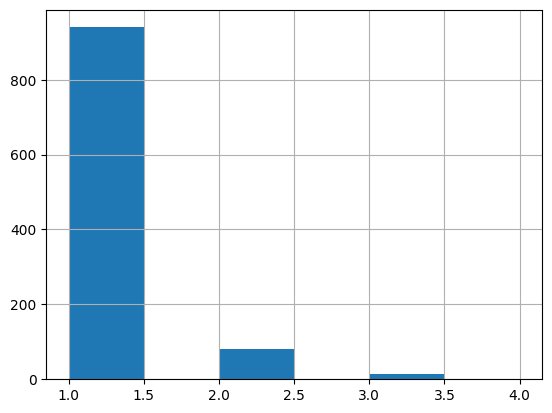

In [25]:
# your code here
stan1290["Number_of_meanings"].hist(bins=6)

Make a nicer plot using [matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html#quick-start). Play with the color, with grid, figure size, etc.

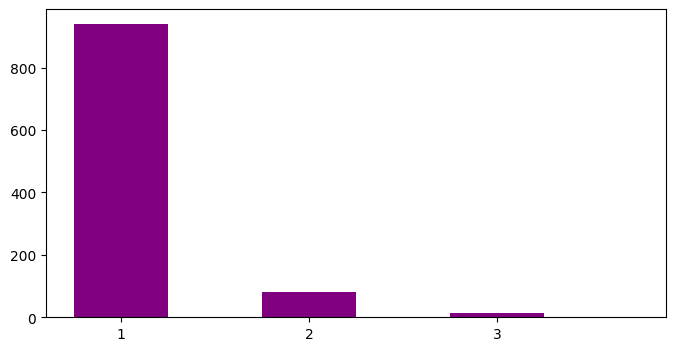

In [26]:
# your code here
# stan1290.plot(x="Number_of_meanings",kind="bar",title="Number of meanings of French words",figsize=(5,5),color="purple")
# plt.legend(["Number of meanings"])
# plt.show()
#I don't know why the figure is so strange, it was even worse when I added grid(axis="x"). Also the x-axis is in black
## Correction:
plt.figure(figsize=(8,4))
plt.hist(stan1290['Number_of_meanings'], 
         bins=6, color='purple', align = 'left')
# only keep integer values on x-axis
plt.xticks(np.arange(1, 4, 1))
plt.show()

Plot the distribution of lengths.

<Axes: >

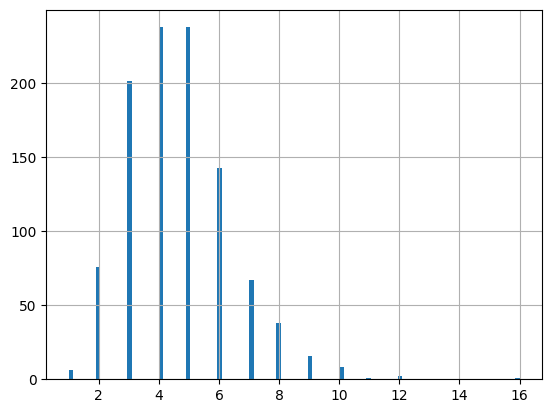

In [27]:
# your code here
stan1290["Length"].hist(bins=100)

Same for the distribution of lengths.

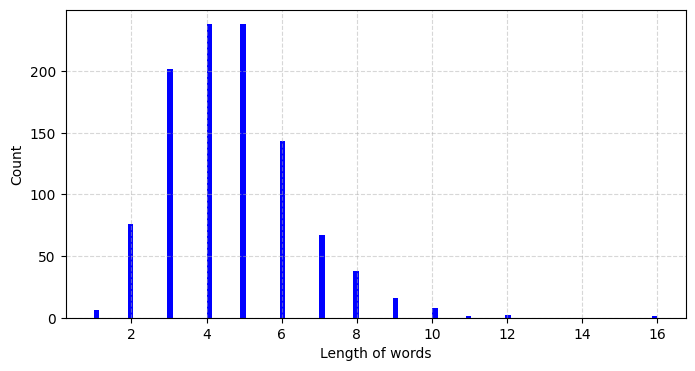

In [28]:
# your code here
# stan1290.plot(x="Length",kind="bar",title="Distribution of French words'length",figsize=(5,5),color="pink")
# plt.legend(["Length"])
# plt.show()
## Correction:
plt.figure(figsize=(8,4))
plt.hist(stan1290['Length'], 
         bins=100, color='blue', align = 'mid')
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel('Length of words')
plt.ylabel('Count')
plt.show()

Try to create other measures of word length, such as the number of syllables 

In [29]:
stan1290['N_Syllables'] = stan1290['CV_Template'].apply(count_syllables)
stan1290.head(10)

,Value,Form,Segments,Concepticon_ID,Concepticon_Gloss,CV_Template,N_Syllables,Length,Number_of_meanings
1303,tout,tu,t u,98,ALL,CV,1,2,1
2640,fourmi,fuʁˈmi,f u ʁ m i,587,ANT,CVCCV,2,5,1
3809,mauvais,moˈvɛ,m o v ɛ,1292,BAD,CVCV,2,4,3
6016,vivant,viˈvɑ̃,v i v ɑ̃,1422,BE ALIVE,CVCV,2,4,1
6017,vivre,ˈviːvʁə,v iː v ʁ ə,1422,BE ALIVE,CVCCV,2,5,1
7561,ventre,ˈvɑ̃ːtʁə,v ɑ̃ː t ʁ ə,1251,BELLY,CVCCV,2,5,1
9245,sous,su,s u,1485,BELOW OR UNDER,CV,1,2,1
9246,au-dessous de,odˈsu_də,o d s u + d ə,1485,BELOW OR UNDER,VCCV+CV,4,7,1
10624,grand,ɡʁɑ̃,g ʁ ɑ̃,1202,BIG,CCV,1,3,1
12827,oiseau,waˈzo,w a z o,937,BIRD,CVCV,2,4,1


Let's plot the relation between the number of sounds and the number of syllables (hint, use matplotlib's scatterplot).

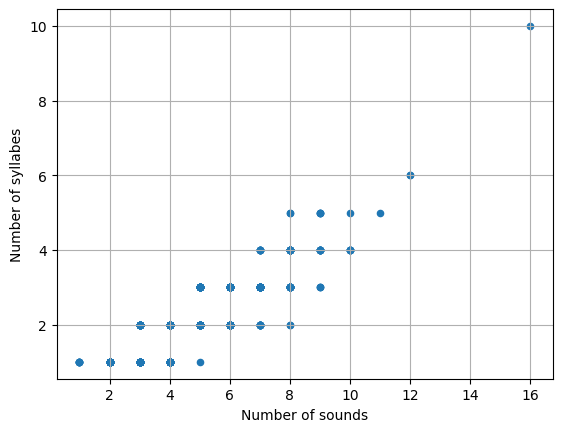

In [30]:
# your code here
stan1290.plot(x="Length",y="N_Syllables",kind="scatter")
plt.grid(axis="both")
plt.xlabel("Number of sounds")
plt.ylabel("Number of syllabes")
plt.show()


Finally, plot the scatterplot with number of meanings on x axis, and the length/number of syllables on y axis (you should have two plots). What can you say about this relationship?

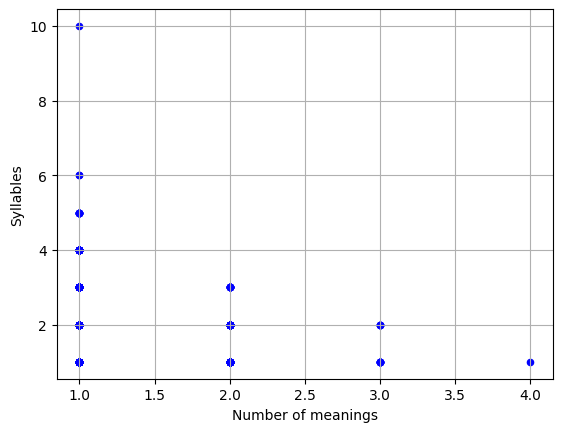

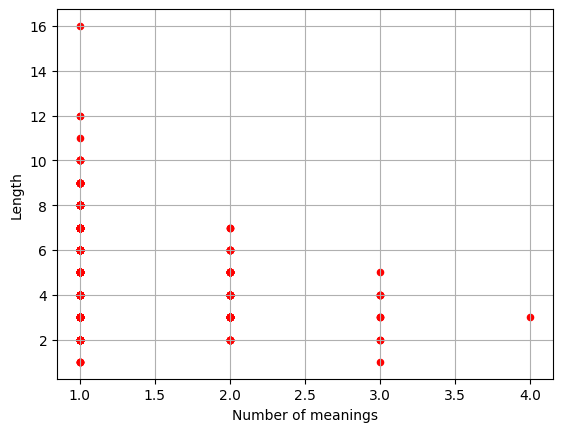

In [31]:
# your code here
stan1290.plot(x="Number_of_meanings",y="N_Syllables",kind="scatter",color="blue")
plt.grid(axis="both")
plt.xlabel("Number of meanings")
plt.ylabel("Syllables")
stan1290.plot(x="Number_of_meanings",y="Length",kind="scatter",color="red")
plt.grid(axis="both")
plt.xlabel("Number of meanings")
plt.ylabel("Length")
plt.show()